In [1]:
import gymnasium as gym
import numpy as np
import random
from Qtabularfunctions import*
from Cartpolefamily import*
from metaQlearning import*
from plotfunctions import*
import matplotlib.pyplot as plt
import random

In [2]:
# state space limits
low = np.array([-4.8, -3.0, -0.418, -3.5])
high = np.array([4.8, 3.0, 0.418, 3.5])

min_td_error = 1e-3  # Minimum TD error threshold to continue episode
consecutive_small_errors = 5  # Number of consecutive small TD errors to trigger stop

num_actions = 501
lr=0.1
gamma=0.99
epsilon=1
force_mag=100

In [3]:
gen = CartPoleCategoryGenerator()

#initial:
agent = TabularQLearningAgent(
    statespace=[low,high],
    num_actions=num_actions,  
    lr=lr,
    gamma=gamma,
    epsilon=epsilon,
    force_mag=force_mag
)

actionspace_dict = {state_tuple: [*range(num_actions)] for state_tuple in agent.disc.get_all_discrete_states()}
actionset_dict = {state_tuple: [] for state_tuple in agent.disc.get_all_discrete_states()}

In [4]:
runner = MetaQLearningRunner(
    gen=gen,  # your environment generator
    low=low,
    high=high, 
    num_actions=num_actions,
    actionset_dict=actionset_dict,
    actionspace_dict=actionspace_dict,
    lr=lr,
    gamma=gamma,
    epsilon=epsilon,
    force_mag=force_mag
)


Starting 10 experiments with:
  Episodes per run: 1000
  Using actionset as action space: False
  Updating actionset_dict: True

--- Starting Run 1/10 ---
Starting experiment with category: medium
Using actionspace_dict as action space (training (updating actionset_dict))


Experiment completed in 1.76 seconds
Mean reward: 20.43 ± 7.32
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 1 completed in 1.76s

--- Starting Run 2/10 ---
Starting experiment with category: easy
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 1.59 seconds
Mean reward: 16.26 ± 6.15
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 2 completed in 1.59s

--- Starting Run 3/10 ---
Starting experiment with category: easy
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 1.51 seconds
Mean reward: 17.85 ± 7.27
Early stops: 0/1000
Mode: training
Actionset dictionary was updated
Run 3 completed in 1.51s

--- Starting Run 4/10 ---
Starting experiment with category: medium
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 1.80 seconds
Mean reward: 20.75 ± 8.42
Early stops: 0/1000
Mode: training
Act

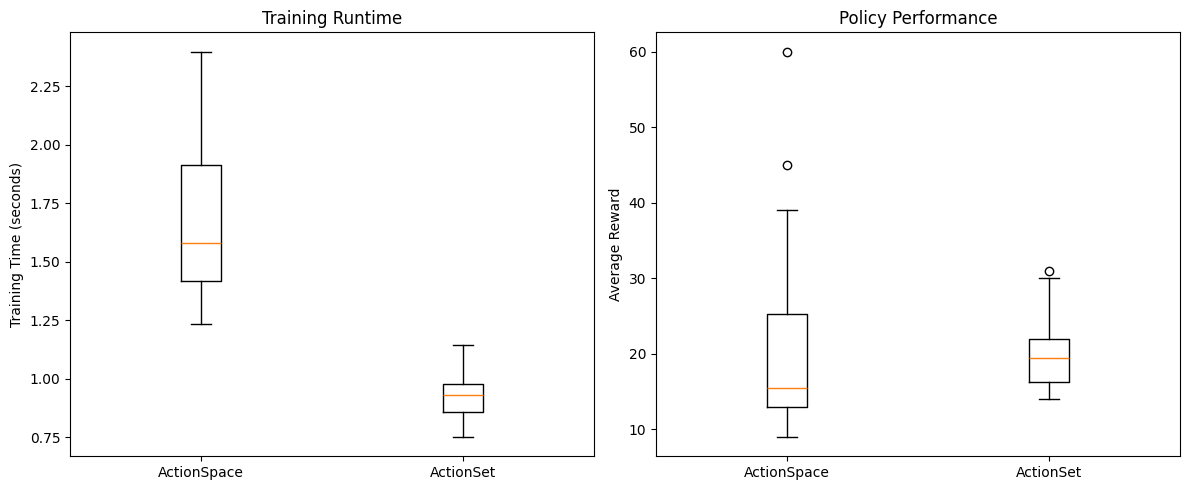

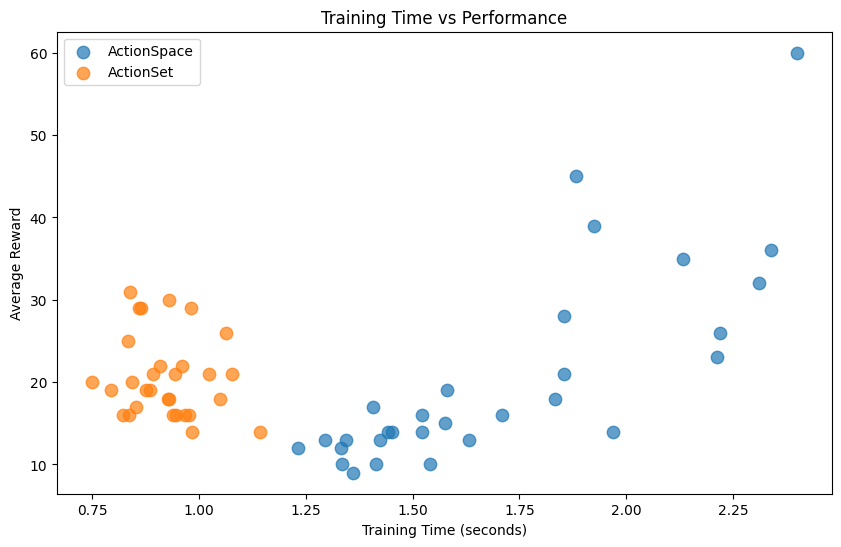

In [5]:
num_runs=10

# Train using actionspace_dict and build actionset_dict
runner.run_multiple_experiments(
    num_runs=num_runs, 
    episodes_per_run=1000,
    update_actionset_dict=True,
    use_actionset_as_actionspace=False,  # Training mode
    verbose=True
)

# Remove repetitions
runner.remove_action_repetitions()

# Save the trained actionset_dict for later use
runner.save_actionset_dict('trained_actionset.pkl')

# Evaluate both action sets for 30 times
print("\n=== Phase 2: Comparing Policy Performance ===")
comparison_results = runner.compare_policy_performance(
    training_episodes=1000,
    evaluation_episodes=1,
    num_comparisons=30
)

# Step 4: Individual detailed evaluations
print("\n=== Phase 3: Detailed Individual Evaluations ===")
plot_training_comparison(comparison_results['detailed_results'])
plot_runtime_vs_reward(comparison_results['detailed_results'])